In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Pre-Processing

In [2]:
user_data=pd.read_csv('application_record.csv')
record=pd.read_csv('credit_record.csv')

In [3]:
user_data['CNT_FAM_MEMBERS']=user_data['CNT_FAM_MEMBERS'].astype('int64')

In [4]:
record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


## 1.1) Setting up target values to binary type

In [5]:
record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [6]:
record=record.replace({"STATUS":{'X':-1,'C':-1}})

In [7]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,-1


In [8]:
record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [9]:
record['STATUS']=record['STATUS'].astype('int64')
record.dtypes

ID                int64
MONTHS_BALANCE    int64
STATUS            int64
dtype: object

In [10]:
record['STATUS']=record['STATUS']+1
record=record.drop(['MONTHS_BALANCE'],axis=1)

In [11]:
record.head()

,ID,STATUS
0,5001711,0
1,5001711,1
2,5001711,1
3,5001711,1
4,5001712,0


In [12]:
# record=record.groupby('ID')['STATUS'].apply(pd.Series.mode)
# record.to_frame()
# record=record.reset_index()
# record=record.drop(['level_1'],axis=1)
# record=record.groupby('ID').max('STATUS') 
# record.head()

In [13]:
record=record.groupby('ID').max('STATUS') 

## 1.2) Merging Record data with the Personal Data

In [14]:
record=pd.merge(user_data,record,how='inner',on='ID')
record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,6
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,6
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,6
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,3


In [15]:
record.loc[record['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED']=0

# 2) Visualization 

## 2.1) Stacked Bar

### 2.1.1) Housing Type  

In [16]:
pivot_bar_housing=record.pivot_table(values='ID',index='NAME_HOUSING_TYPE',columns='STATUS',aggfunc=np.size)

In [17]:
pivot_bar_housing.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_housing

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_HOUSING_TYPE,,,,,,,
Co-op apartment,30.0,124.0,11.0,NaN,1.0,NaN,2.0
House / apartment,3967.0,24799.0,3242.0,280.0,66.0,39.0,155.0
Municipal apartment,145.0,833.0,120.0,8.0,5.0,5.0,12.0
Office apartment,34.0,190.0,29.0,5.0,2.0,NaN,2.0
Rented apartment,65.0,430.0,72.0,3.0,1.0,NaN,4.0
With parents,214.0,1335.0,201.0,18.0,1.0,2.0,5.0


<Figure size 640x480 with 0 Axes>

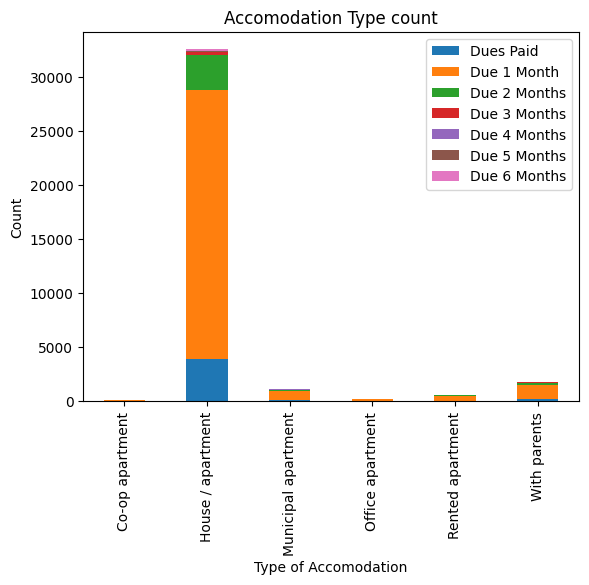

In [18]:
fig=plt.figure(1)
df = pd.DataFrame(pivot_bar_housing)
df.plot.bar(stacked=True)
plt.xlabel('Type of Accomodation')
plt.ylabel('Count')
plt.title('Accomodation Type count') 
plt.savefig('bar_accomodation.png',dpi=300, bbox_inches = "tight")
plt.show()

In [19]:
piv_bar_excel_housing = pd.ExcelWriter('pivot_housing_vs_dues.xlsx')
pivot_bar_housing.to_excel(piv_bar_excel_housing)
piv_bar_excel_housing.save()

### 2.1.2) Education Type

In [20]:
pivot_bar_education=record.pivot_table(values='ID',index='NAME_EDUCATION_TYPE',columns='STATUS',aggfunc=np.size)
pivot_bar_education=pivot_bar_education.reindex(index=['Academic degree','Higher education','Incomplete higher','Secondary / secondary special','Lower secondary'])

In [21]:
pivot_bar_education.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_education

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_EDUCATION_TYPE,,,,,,,
Academic degree,4.0,21.0,7.0,NaN,NaN,NaN,NaN
Higher education,1265.0,7451.0,977.0,80.0,24.0,10.0,57.0
Incomplete higher,152.0,1051.0,174.0,13.0,4.0,9.0,7.0
Secondary / secondary special,2996.0,18891.0,2488.0,218.0,48.0,26.0,110.0
Lower secondary,38.0,297.0,29.0,3.0,NaN,1.0,6.0


<Figure size 640x480 with 0 Axes>

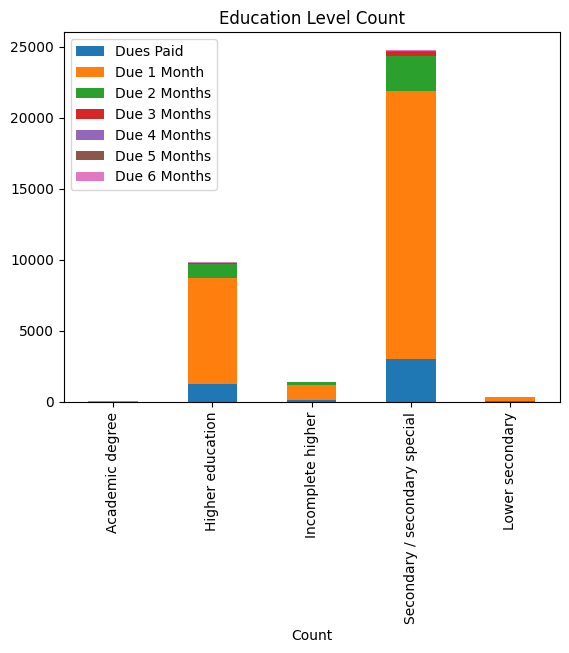

In [22]:
fig=plt.figure(2)
df = pd.DataFrame(pivot_bar_education)
df.plot.bar(stacked=True)
plt.xlabel('Education Level')
plt.xlabel('Count')
plt.title('Education Level Count')
plt.savefig('bar_education.png',dpi=300, bbox_inches = "tight")
plt.show()

In [23]:
piv_bar_excel_education = pd.ExcelWriter('pivot_education_vs_dues.xlsx')
pivot_bar_education.to_excel(piv_bar_excel_education)
piv_bar_excel_education.save()

### 2.1.3) Income Type

In [24]:
pivot_bar_incometype=record.pivot_table(values='ID',index='NAME_INCOME_TYPE',columns='STATUS',aggfunc=np.size)

In [25]:
pivot_bar_incometype.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_incometype

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_INCOME_TYPE,,,,,,,
Commercial associate,1096.0,6314.0,937.0,60.0,14.0,20.0,49.0
Pensioner,752.0,4756.0,514.0,59.0,26.0,7.0,38.0
State servant,349.0,2251.0,348.0,18.0,8.0,NaN,11.0
Student,NaN,10.0,1.0,NaN,NaN,NaN,NaN
Working,2258.0,14380.0,1875.0,177.0,28.0,19.0,82.0


<Figure size 640x480 with 0 Axes>

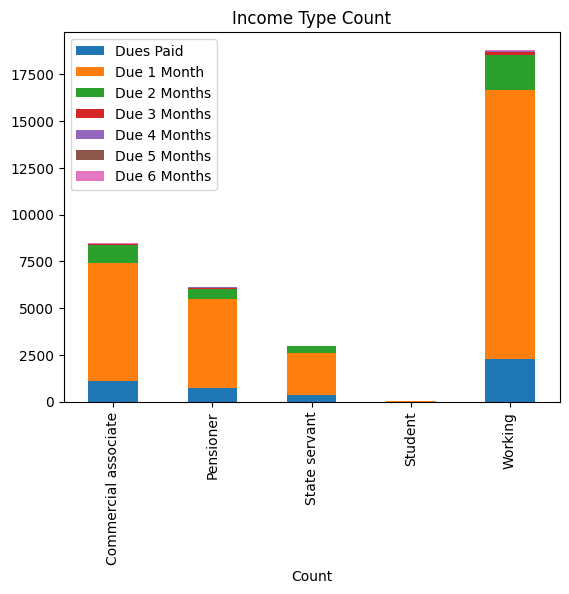

In [26]:
fig=plt.figure(3)
df = pd.DataFrame(pivot_bar_incometype)
df.plot.bar(stacked=True)
plt.xlabel('Type of Income')
plt.xlabel('Count')
plt.title('Income Type Count')
plt.savefig('bar_income.png',dpi=300, bbox_inches = "tight")
plt.show()

In [27]:
piv_bar_excel_incometype = pd.ExcelWriter('pivot_incometype_vs_dues.xlsx')
pivot_bar_incometype.to_excel(piv_bar_excel_incometype)
piv_bar_excel_incometype.save()

### 2.1.4) Family Status 

In [28]:
pivot_bar_familystatus=record.pivot_table(values='ID',index='NAME_FAMILY_STATUS',columns='STATUS',aggfunc=np.size)

In [29]:
pivot_bar_familystatus.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_familystatus

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_FAMILY_STATUS,,,,,,,
Civil marriage,380.0,2198.0,321.0,38.0,2.0,NaN,6.0
Married,3061.0,19073.0,2521.0,195.0,48.0,25.0,125.0
Separated,271.0,1607.0,194.0,4.0,10.0,4.0,13.0
Single / not married,561.0,3645.0,522.0,50.0,6.0,16.0,29.0
Widow,182.0,1188.0,117.0,27.0,10.0,1.0,7.0


<Figure size 640x480 with 0 Axes>

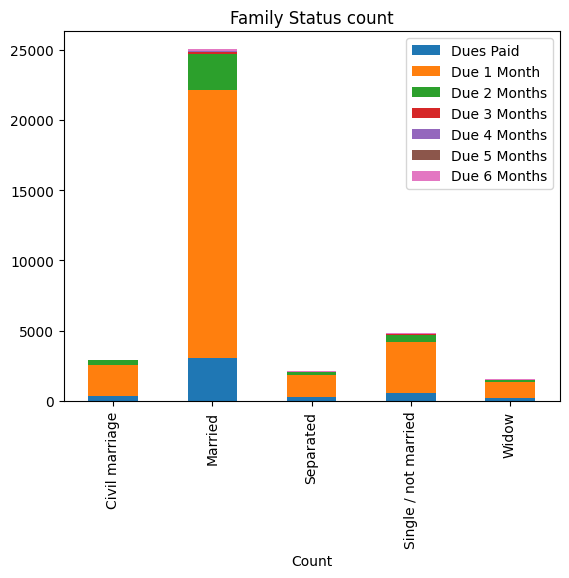

In [30]:
fig=plt.figure(4)
df = pd.DataFrame(pivot_bar_familystatus)
df.plot.bar(stacked=True)
plt.xlabel('Family Status')
plt.xlabel('Count')
plt.title('Family Status count')
plt.savefig('bar_family.png',dpi=300, bbox_inches = "tight")
plt.show()

In [31]:
piv_bar_excel_familystatus = pd.ExcelWriter('pivot_familystatus_vs_dues.xlsx')
pivot_bar_familystatus.to_excel(piv_bar_excel_familystatus)
piv_bar_excel_familystatus.save()

### 2.1.5) Gender

In [32]:
pivot_bar_gender=record.pivot_table(values='ID',index='CODE_GENDER',columns='STATUS',aggfunc=np.size)

In [33]:
record['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [34]:
pivot_bar_gender.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_gender.index=['Female','Male']
pivot_bar_gender

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
Female,2960,18712,2379,193,54,21,111
Male,1495,8999,1296,121,22,25,69


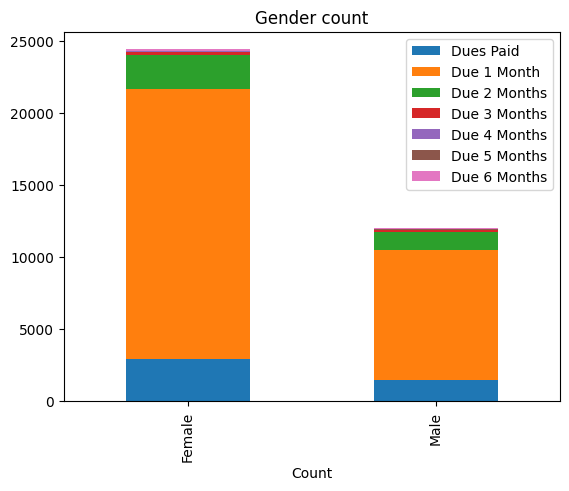

In [35]:
df = pd.DataFrame(pivot_bar_gender)
df.plot.bar(stacked=True)
plt.xlabel('Gender')
plt.xlabel('Count')
plt.title('Gender count')
plt.savefig('bar_gender.png',dpi=300, bbox_inches = "tight")
plt.show()

In [36]:
piv_bar_excel_gender = pd.ExcelWriter('pivot_gender_vs_dues.xlsx')
pivot_bar_gender.to_excel(piv_bar_excel_gender)
piv_bar_excel_gender.save()

### 2.1.6) Occupation Type

In [37]:
pivot_bar_occupation=record.pivot_table(values='ID',index='OCCUPATION_TYPE',columns='STATUS',aggfunc=np.size)

In [38]:
pivot_bar_occupation.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_occupation

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
OCCUPATION_TYPE,,,,,,,
Accountants,175.0,919.0,124.0,16.0,2.0,2.0,3.0
Cleaning staff,56.0,432.0,58.0,2.0,1.0,NaN,2.0
Cooking staff,80.0,489.0,77.0,4.0,NaN,NaN,5.0
Core staff,464.0,2664.0,389.0,25.0,15.0,8.0,26.0
Drivers,259.0,1615.0,215.0,34.0,3.0,5.0,7.0
HR staff,11.0,60.0,13.0,1.0,NaN,NaN,NaN
High skill tech staff,152.0,1050.0,151.0,17.0,1.0,2.0,10.0
IT staff,8.0,41.0,8.0,1.0,NaN,NaN,2.0
Laborers,812.0,4669.0,631.0,51.0,8.0,12.0,28.0


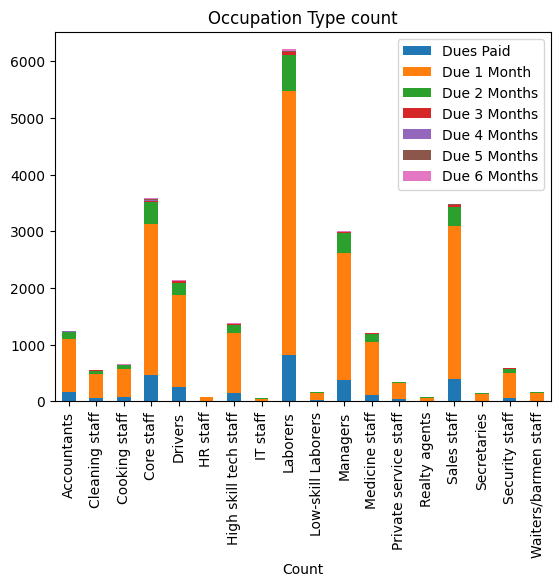

In [39]:
df = pd.DataFrame(pivot_bar_occupation)
df.plot.bar(stacked=True)
plt.xlabel('Occupation Type')
plt.xlabel('Count')
plt.title('Occupation Type count')
plt.savefig('bar_occupation.png',dpi=300, bbox_inches = "tight")
plt.show()

In [40]:
piv_bar_excel_occupation = pd.ExcelWriter('pivot_occupation_vs_dues.xlsx')
pivot_bar_occupation.to_excel(piv_bar_excel_occupation)
piv_bar_excel_occupation.save()

## 2.2) Pie Chart

## 2.2.1) Gender

In [41]:
pie_chart_gender=record['CODE_GENDER'].value_counts()
pie_chart_gender

F    24430
M    12027
Name: CODE_GENDER, dtype: int64

In [42]:
pie_chart_excel_gender = pd.ExcelWriter('pie_chart_gender.xlsx')
pie_chart_gender.to_excel(pie_chart_excel_gender)
pie_chart_excel_gender.save()

### 2.2.2) Status

In [43]:
pie_chart_status=record['STATUS'].value_counts()
pie_chart_status

1    27711
0     4455
2     3675
3      314
6      180
4       76
5       46
Name: STATUS, dtype: int64

In [44]:
pie_chart_excel_status = pd.ExcelWriter('pie_chart_status.xlsx')
pie_chart_status.to_excel(pie_chart_excel_status)
pie_chart_excel_status.save()

## 2.3) Bar Chart

### 2.3.1) Count of Income per type

In [45]:
bar_chart_incometype=record['NAME_INCOME_TYPE'].value_counts()
bar_chart_incometype

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [46]:
bar_chart_excel_incometype = pd.ExcelWriter('bar_chart_incometype.xlsx')
bar_chart_incometype.to_excel(bar_chart_excel_incometype)
bar_chart_excel_incometype.save()

## 2.4) Histogram

### 2.4.1) Amount of Income 

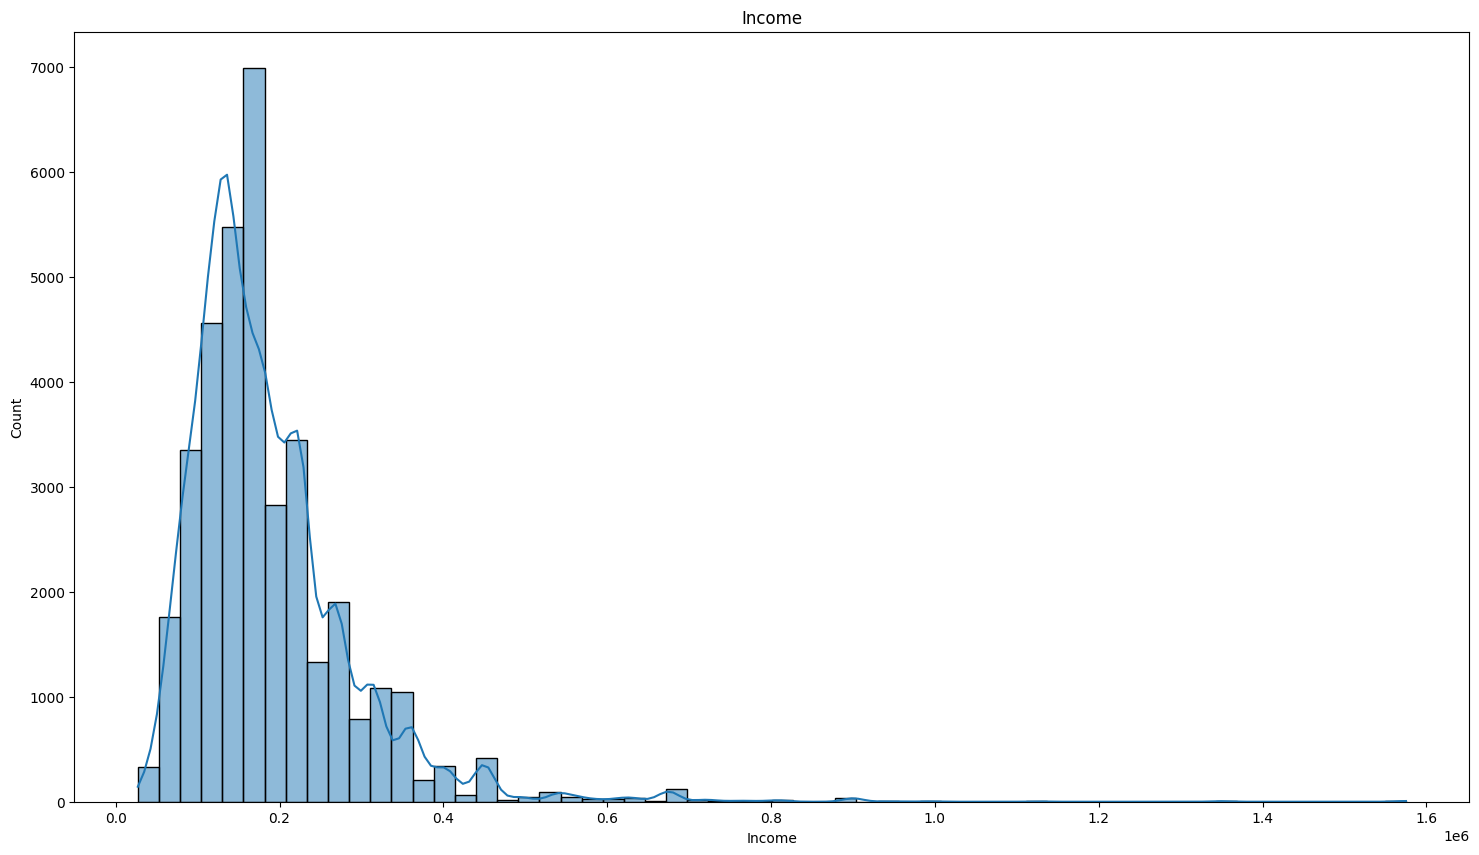

In [47]:
plt.subplots(figsize=(18,10))
sns.histplot(np.abs(record['AMT_INCOME_TOTAL']),bins=60,kde=True)
plt.xlabel('Income')
plt.title('Income')
plt.savefig('hist_income.png',dpi=300, bbox_inches = "tight")
plt.show()

### 2.4.2) Age

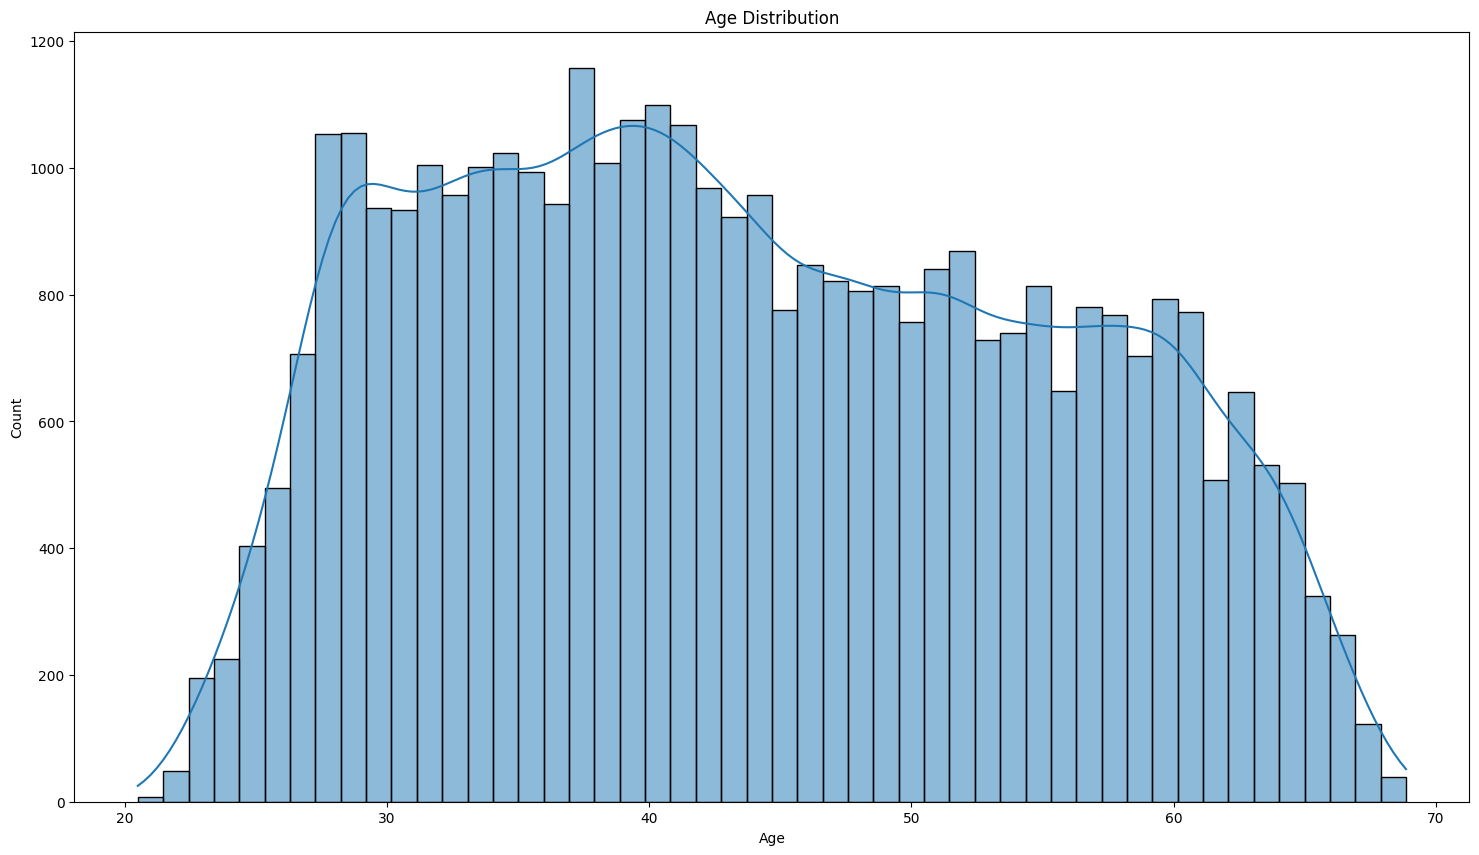

In [48]:
plt.subplots(figsize=(18,10))
sns.histplot(np.abs(record['DAYS_BIRTH']/365.25),bins=50,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.savefig('hist_age.png',dpi=300, bbox_inches = "tight")
plt.show()

## 2.5) Jointplot 

### 2.5.1)  Income vs Age

C:\Users\hp\AppData\Local\Temp\ipykernel_10664\2667214062.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('income_vs_age.png',dpt=100)


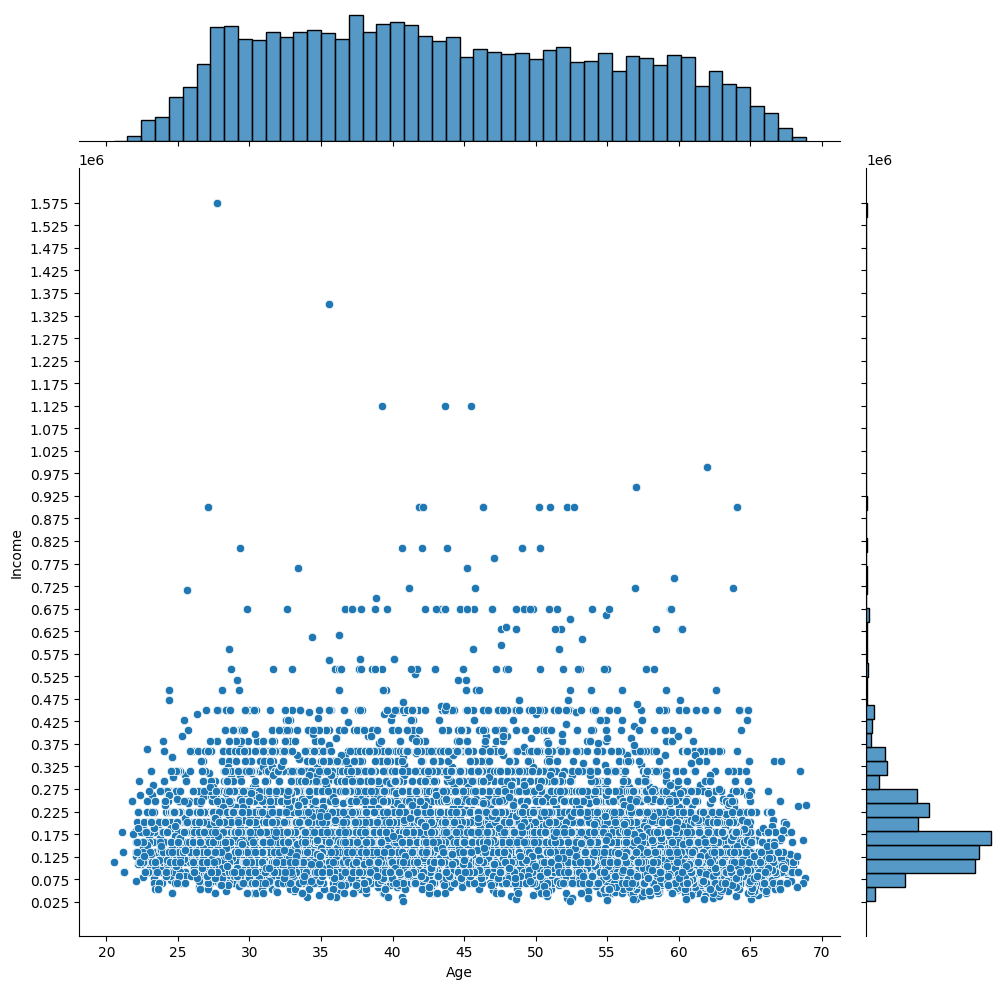

In [49]:
record['Age']=np.abs(record['DAYS_BIRTH']/365.25)
sns.jointplot(data=record,x='Age',y='AMT_INCOME_TOTAL', kind="scatter", height=10,marginal_kws=dict(bins=50, fill=True))
plt.yticks(np.arange(25000, 1600000, 50000))
plt.xticks(np.arange(20, 75, 5))
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig('income_vs_age.png',dpt=100)
plt.show()

In [50]:
record=record.drop(['Age'],axis=1)

## 2.6) Scatter Plot 

### 2.6.1) Age vs Working age

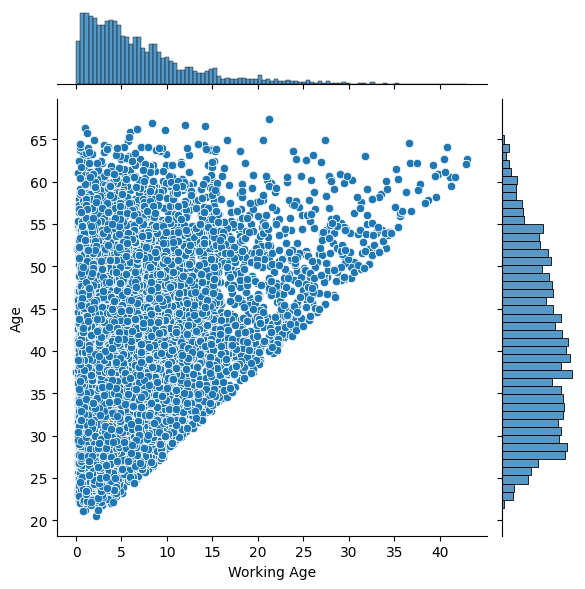

In [51]:
record['Years_employed']=np.abs(record.loc[record['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']/365.25)
record['Age']=np.abs(record.loc[record['DAYS_EMPLOYED']<0,'DAYS_BIRTH']/365.25)
sns.jointplot(data=record,x='Years_employed',y='Age')
plt.yticks(np.arange(20, 70, 5))
plt.xticks(np.arange(0, 45, 5))
plt.xlabel('Working Age')
plt.savefig('scatter_age_vs_working_age.png',dpi=300, bbox_inches = "tight")
plt.show()

In [52]:
record=record.drop(['Age','Years_employed'],axis=1)

## 2.7) Strip plot 

### 2.7.1) Type of Job vs Salary

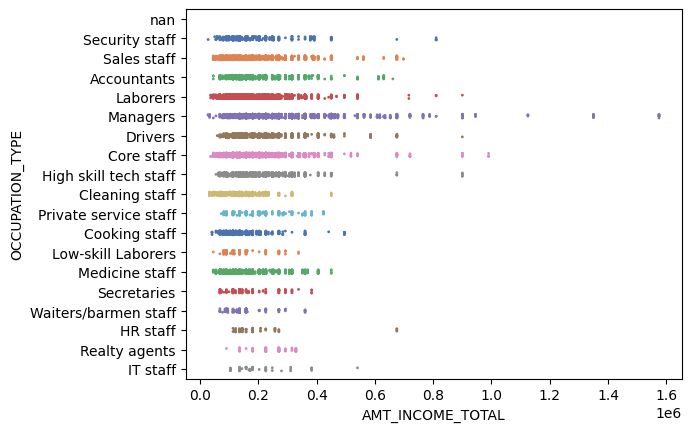

In [53]:
sns.stripplot(data=record,y='OCCUPATION_TYPE',x='AMT_INCOME_TOTAL',hue='OCCUPATION_TYPE',palette="deep",legend=False,s=2)
plt.savefig('strip_plot_occupation_vs_salary.png',dpi=300, bbox_inches = "tight")
plt.show()

## 2.8) Box Plot 

### 2.8.1) Salary vs Occupation vs Gender

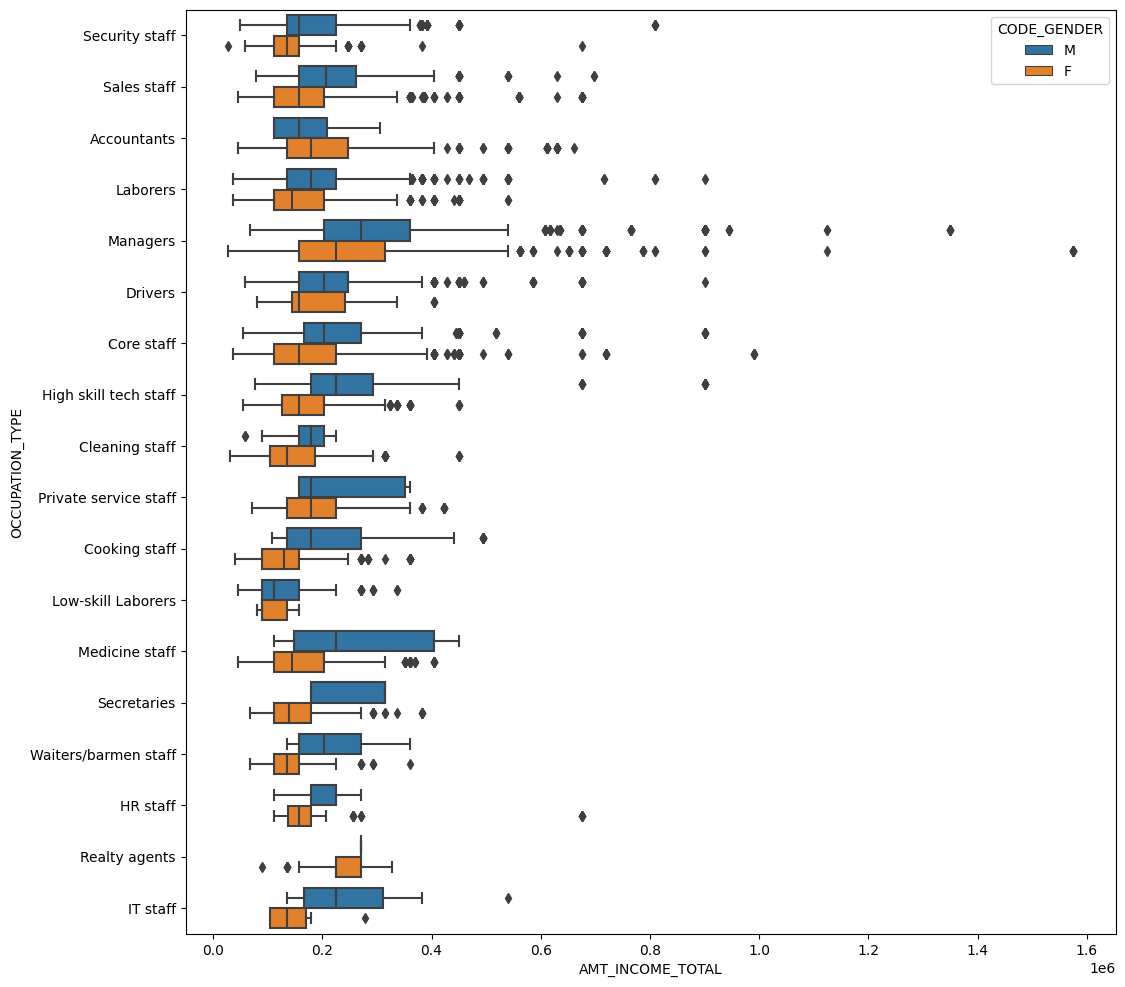

In [54]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.boxplot(data=record,x='AMT_INCOME_TOTAL',y='OCCUPATION_TYPE',hue='CODE_GENDER',ax=ax)
plt.savefig('box_plot_salary_occupation_gender.png',dpi=300, bbox_inches = "tight")
plt.show()

### 2.8.2) Salary vs Gender

C:\Users\hp\AppData\Local\Temp\ipykernel_10664\1599055468.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('income vs gender',dpt=100)


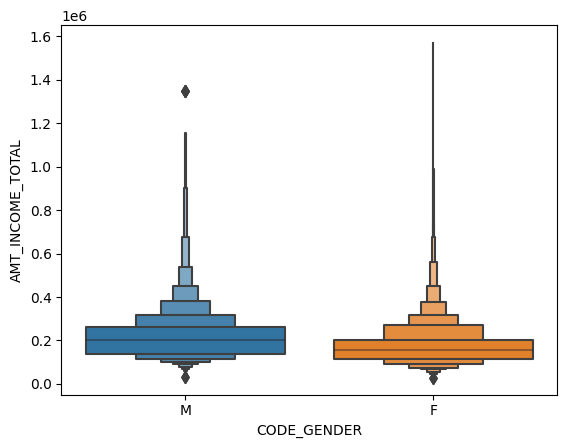

In [55]:
sns.boxenplot(data=record,y='AMT_INCOME_TOTAL',x='CODE_GENDER')
plt.savefig('income vs gender',dpt=100)

# 3) Pre-Processing for ML 

In [56]:
check_gender=record['CODE_GENDER'].unique()
record['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [57]:
check_car=record['FLAG_OWN_CAR'].unique()
record['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [58]:
check_reality=record['FLAG_OWN_REALTY'].unique()
record['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [59]:
record[record['STATUS']==2]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
18,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2,2
19,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2,2
20,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36082,5150412,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22116,0,1,0,0,0,NaN,1,2
36087,5150417,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22116,0,1,0,0,0,NaN,1,2
36096,5150459,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-14234,-309,1,0,0,0,Core staff,3,2
36098,5150463,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-14234,-309,1,0,0,0,Core staff,3,2


In [60]:
from function_file import change_to_bi

In [61]:
change_to_bi(record,'CODE_GENDER')
change_to_bi(record,'FLAG_OWN_CAR')
change_to_bi(record,'FLAG_OWN_REALTY')
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,1
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0


In [62]:
record['NAME_EDUCATION_TYPE'].unique() # special type of categorical value

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [63]:
check_education=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']
record['NAME_EDUCATION_TYPE']=record['NAME_EDUCATION_TYPE'].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[0,1,2,3,4])
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,Working,3,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
1,5008805,0,0,0,0,427500.0,Working,3,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,2
2,5008806,0,0,0,0,112500.0,Working,1,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,1
3,5008808,1,1,0,0,270000.0,Commercial associate,1,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1
4,5008809,1,1,0,0,270000.0,Commercial associate,1,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0


In [64]:
check_income_type=record['NAME_INCOME_TYPE'].unique()
record['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [65]:
check_family=record['NAME_FAMILY_STATUS'].unique()
record['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [66]:
check_house=record['NAME_HOUSING_TYPE'].unique()
record['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [67]:
check_occupation=record['OCCUPATION_TYPE'].unique()
record['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [68]:
from function_file import change_to_num # execute this code, if not installed : !pip install ipynb

In [69]:
change_to_num(record,'NAME_INCOME_TYPE')
change_to_num(record,'NAME_FAMILY_STATUS')
change_to_num(record,'NAME_HOUSING_TYPE')
change_to_num(record,'OCCUPATION_TYPE')
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,2
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,2
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2,1
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,1
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0


In [70]:
record.loc[record['STATUS']<=1,'STATUS']=0
record.loc[record['STATUS']>1,'STATUS']=1  # on or off
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2,0
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0


In [71]:
record[record['STATUS']==0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2,0
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
5,5008810,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
6,5008811,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,5150465,1,0,0,1,112500.0,0,1,1,1,-14234,-309,1,0,0,0,7,3,0
36101,5150466,1,0,0,1,112500.0,0,1,1,1,-14234,-309,1,0,0,0,7,3,0
36102,5150467,1,1,0,0,180000.0,0,1,1,1,-17713,-2441,1,0,0,0,11,2,0
36103,5150468,1,1,0,0,180000.0,0,1,1,1,-17713,-2441,1,0,0,0,11,2,0


In [72]:
record[record['STATUS']==1]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,1
18,5008825,1,0,1,0,130500.0,0,2,1,1,-10669,-1103,1,0,0,0,3,2,1
19,5008826,1,0,1,0,130500.0,0,2,1,1,-10669,-1103,1,0,0,0,3,2,1
20,5008830,1,1,0,0,157500.0,0,1,1,1,-10031,-1469,1,0,1,0,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2,1
36453,5149834,1,1,0,0,157500.0,1,3,1,1,-12387,-1325,1,0,1,1,13,2,1
36454,5149838,1,1,0,0,157500.0,2,3,1,1,-12387,-1325,1,0,1,1,13,2,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2,1


# 4) Correlation

In [73]:
record_corr=record

In [74]:
record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2,0
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2,1
36453,5149834,1,1,0,0,157500.0,1,3,1,1,-12387,-1325,1,0,1,1,13,2,1
36454,5149838,1,1,0,0,157500.0,2,3,1,1,-12387,-1325,1,0,1,1,13,2,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2,1


In [75]:
record_corr['DAYS_EMPLOYED']=record_corr['DAYS_EMPLOYED'] * -1
record_corr['DAYS_BIRTH']=record_corr['DAYS_BIRTH'] * -1

In [76]:
record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,1,0,0,0,2,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,1,0,0,0,2,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,21474,1134,1,0,0,0,1,2,0
3,5008808,1,1,0,0,270000.0,1,1,2,1,19110,3051,1,0,1,1,2,1,0
4,5008809,1,1,0,0,270000.0,1,1,2,1,19110,3051,1,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,17348,2420,1,0,0,0,5,2,1
36453,5149834,1,1,0,0,157500.0,1,3,1,1,12387,1325,1,0,1,1,13,2,1
36454,5149838,1,1,0,0,157500.0,2,3,1,1,12387,1325,1,0,1,1,13,2,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,17958,655,1,0,0,0,2,2,1


In [77]:
record_corr.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
ID,1.000000,-0.012022,0.011163,0.098851,0.028878,-0.017667,-0.022184,0.010222,-0.018516,0.038670,-0.056016,-0.005745,NaN,0.079215,0.009879,-0.046979,0.023777,0.026624,0.003565
CODE_GENDER,-0.012022,1.000000,0.361379,-0.050758,-0.077690,-0.197805,0.158594,0.008005,0.125867,-0.053499,0.202352,0.031731,NaN,-0.064994,0.026833,0.003284,-0.024118,-0.110782,-0.021257
FLAG_OWN_CAR,0.011163,0.361379,1.000000,-0.015185,-0.105839,-0.215506,0.110925,-0.103529,0.119062,-0.025786,0.157144,-0.006244,NaN,-0.021644,0.014019,-0.021750,-0.043543,-0.151814,0.010580
FLAG_OWN_REALTY,0.098851,-0.050758,-0.015185,1.000000,0.000575,-0.032719,-0.049448,0.010563,-0.022472,0.163836,-0.129838,0.033646,NaN,0.207732,0.066601,-0.052194,0.033788,0.005723,0.027990
CNT_CHILDREN,0.028878,-0.077690,-0.105839,0.000575,1.000000,0.033691,-0.126058,0.051372,-0.131353,0.042399,-0.339357,0.043358,NaN,0.048091,-0.016291,0.015960,0.109439,0.889114,0.011525
AMT_INCOME_TOTAL,-0.017667,-0.197805,-0.215506,-0.032719,0.033691,1.000000,-0.012952,0.231710,-0.006935,-0.003048,-0.067908,0.087130,NaN,-0.037746,0.017245,0.086681,0.057708,0.023750,0.024202
NAME_INCOME_TYPE,-0.022184,0.158594,0.110925,-0.049448,-0.126058,-0.012952,1.000000,0.028331,0.079021,-0.026526,0.346406,-0.153190,NaN,-0.183092,-0.009797,-0.021901,-0.159980,-0.123481,0.001749
NAME_EDUCATION_TYPE,0.010222,0.008005,-0.103529,0.010563,0.051372,0.231710,0.028331,1.000000,-0.016865,0.041232,-0.164892,0.024813,NaN,0.017085,0.044684,0.097946,0.022099,0.042220,0.002813
NAME_FAMILY_STATUS,-0.018516,0.125867,0.119062,-0.022472,-0.131353,-0.006935,0.079021,-0.016865,1.000000,-0.015167,0.170975,-0.040225,NaN,-0.059966,0.002918,-0.020668,-0.050474,-0.497094,-0.006522
NAME_HOUSING_TYPE,0.038670,-0.053499,-0.025786,0.163836,0.042399,-0.003048,-0.026526,0.041232,-0.015167,1.000000,-0.137401,-0.002128,NaN,0.023633,-0.009420,-0.013272,0.038900,0.031604,0.007262


In [78]:
record_corr=record_corr.drop(['ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE'],axis=1)

In [79]:
record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,1,0,0,0,2,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,1,0,0,0,2,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,21474,1134,1,0,0,0,1,2,0
3,5008808,1,1,0,0,270000.0,1,1,2,1,19110,3051,1,0,1,1,2,1,0
4,5008809,1,1,0,0,270000.0,1,1,2,1,19110,3051,1,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,17348,2420,1,0,0,0,5,2,1
36453,5149834,1,1,0,0,157500.0,1,3,1,1,12387,1325,1,0,1,1,13,2,1
36454,5149838,1,1,0,0,157500.0,2,3,1,1,12387,1325,1,0,1,1,13,2,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,17958,655,1,0,0,0,2,2,1


In [80]:
record_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,0,427500.0,3,12005,4542,2,1
1,0,427500.0,3,12005,4542,2,1
2,0,112500.0,1,21474,1134,2,0
3,0,270000.0,1,19110,3051,1,0
4,0,270000.0,1,19110,3051,1,0
...,...,...,...,...,...,...,...
36452,0,315000.0,1,17348,2420,2,1
36453,0,157500.0,3,12387,1325,2,1
36454,0,157500.0,3,12387,1325,2,1
36455,0,283500.0,1,17958,655,2,1


In [81]:
record_corr.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CNT_CHILDREN,1.000000,0.033691,0.051372,-0.339357,0.043358,0.889114,0.011525
AMT_INCOME_TOTAL,0.033691,1.000000,0.231710,-0.067908,0.087130,0.023750,0.024202
NAME_EDUCATION_TYPE,0.051372,0.231710,1.000000,-0.164892,0.024813,0.042220,0.002813
DAYS_BIRTH,-0.339357,-0.067908,-0.164892,1.000000,-0.023497,-0.304020,-0.028943
DAYS_EMPLOYED,0.043358,0.087130,0.024813,-0.023497,1.000000,0.054587,0.005165
CNT_FAM_MEMBERS,0.889114,0.023750,0.042220,-0.304020,0.054587,1.000000,0.009004
STATUS,0.011525,0.024202,0.002813,-0.028943,0.005165,0.009004,1.000000


<Figure size 640x480 with 0 Axes>

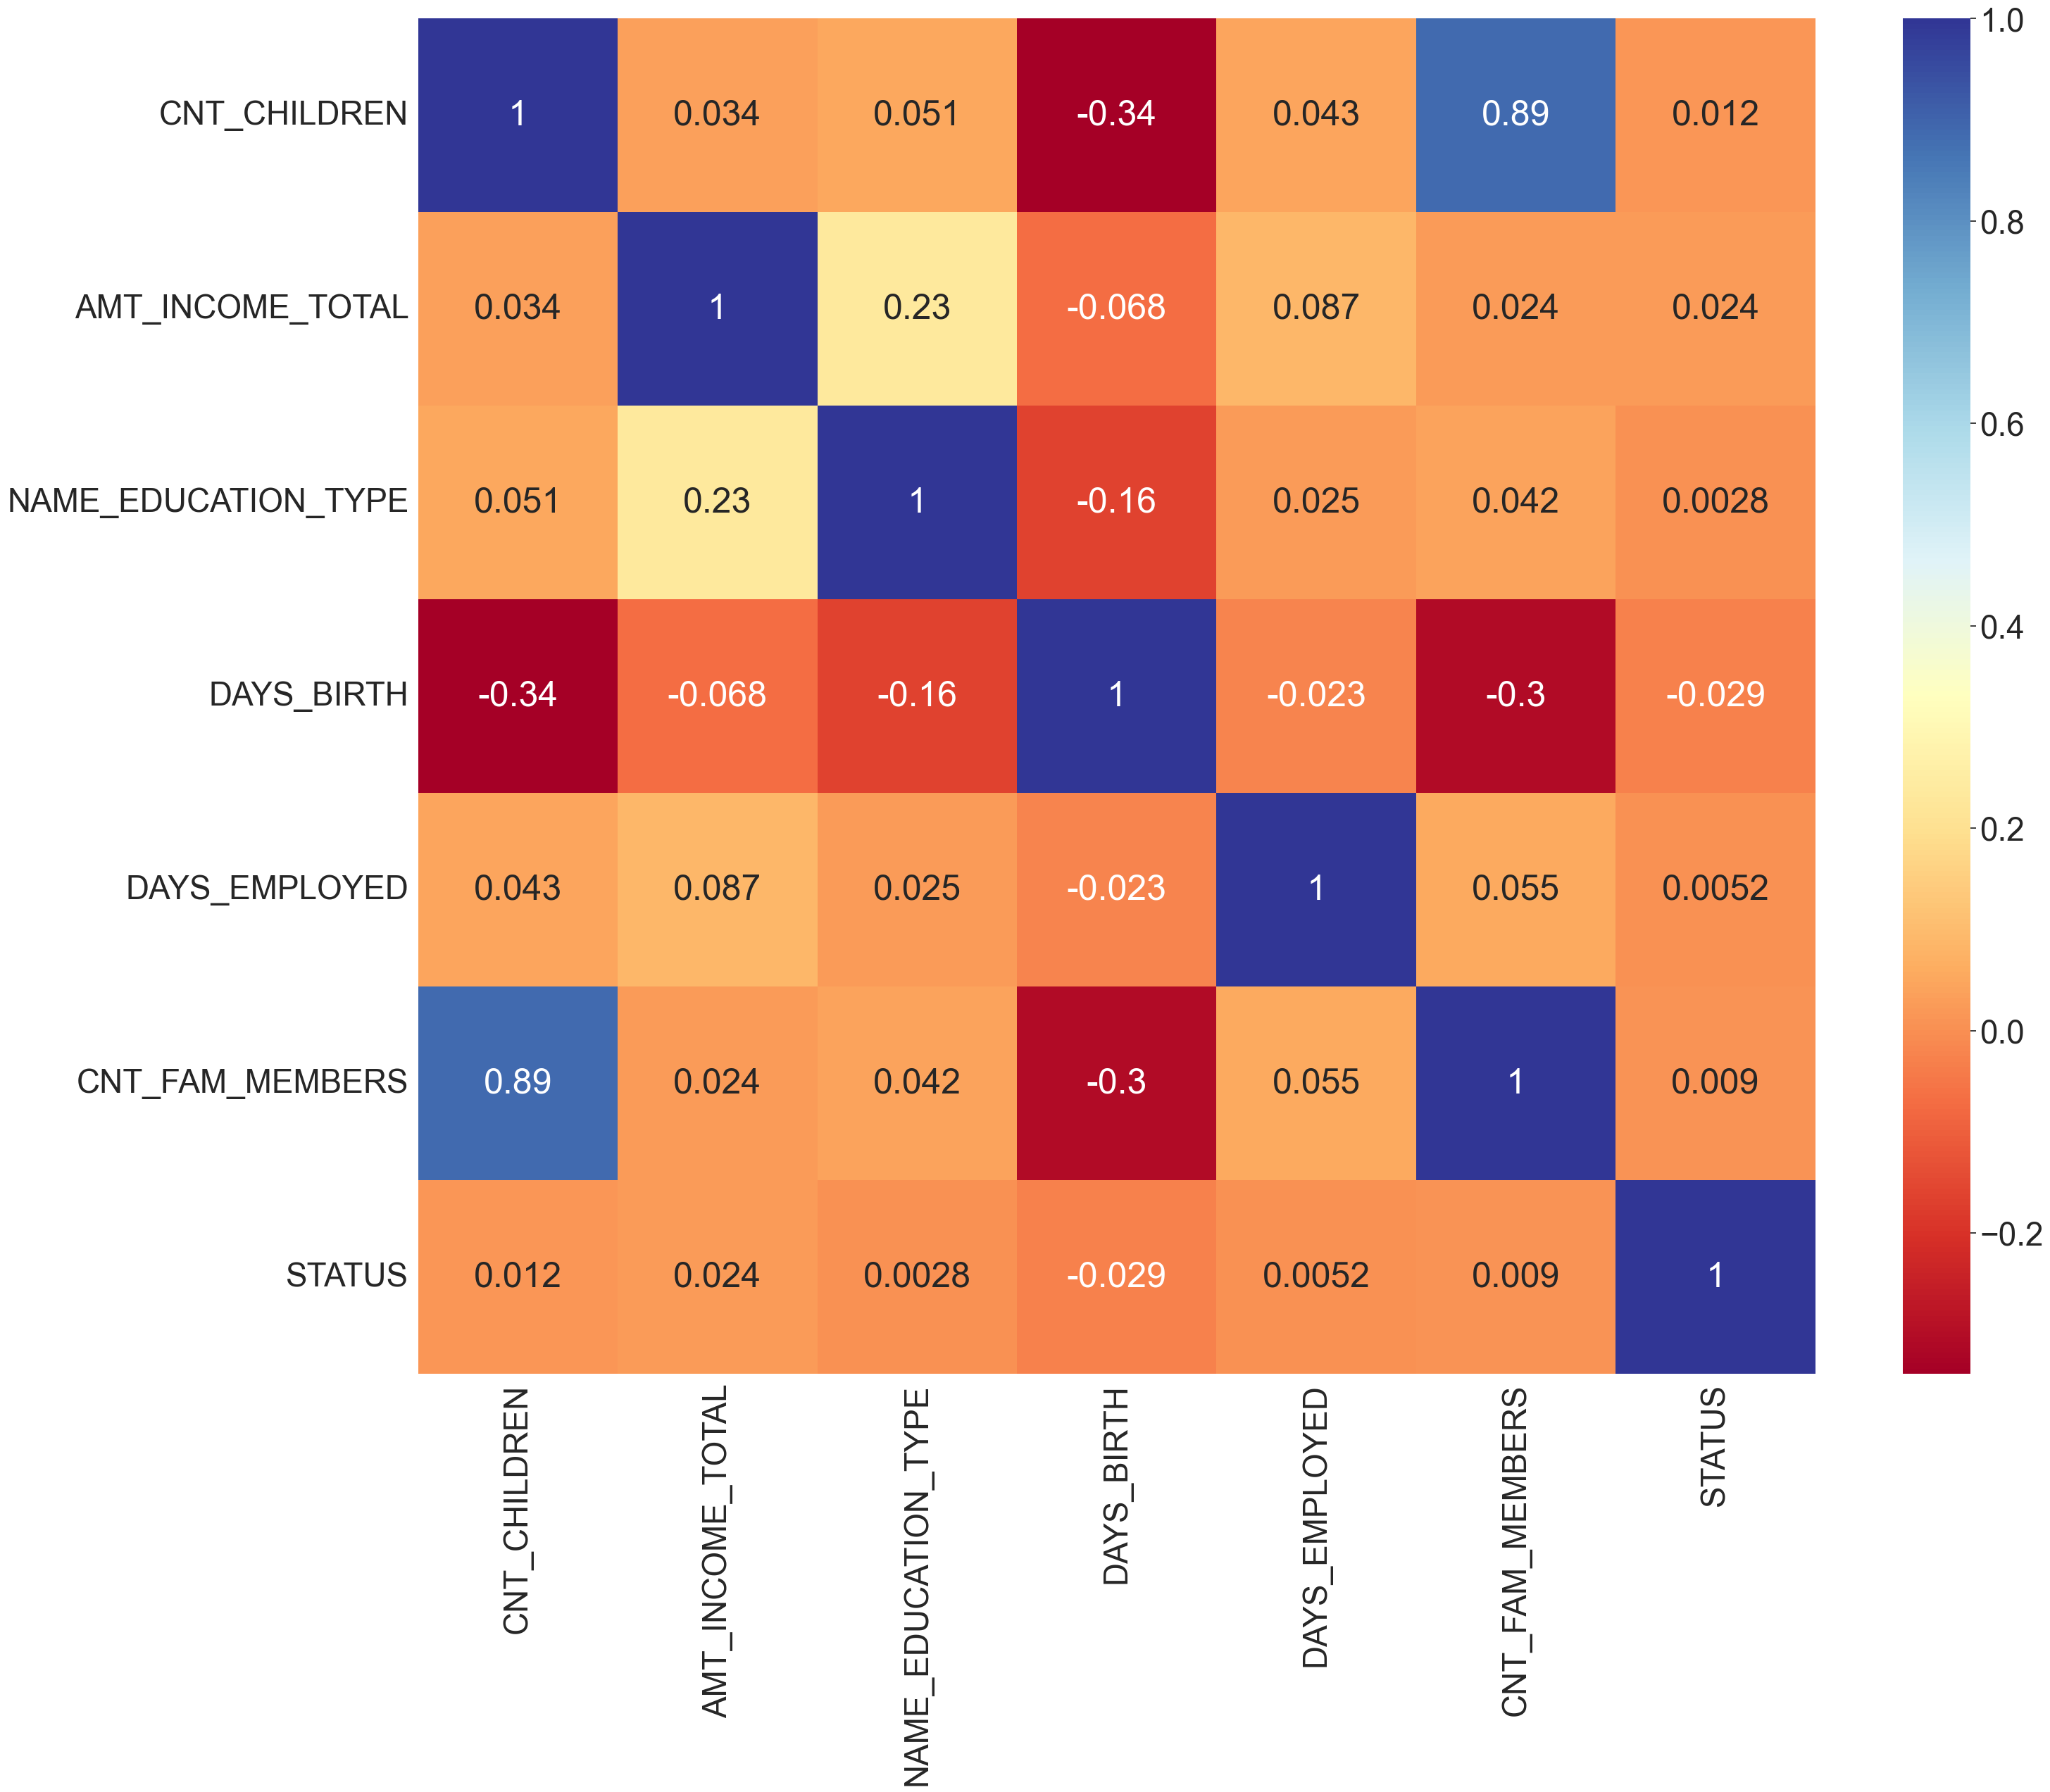

In [82]:
sns.set(font_scale=3)
plt.figure(1)
plt.figure(figsize=(32,25))
sns.heatmap(record_corr.corr(),annot=True,cmap='RdYlBu')
sns.set(font_scale=2)
plt.savefig('coorelation.png',dpi=300, bbox_inches = "tight")
plt.show()

# 5) Pre Processing based on coorelation graph

In [83]:
record=record.drop(['ID'],axis=1)
record

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,1,0,0,0,2,1
1,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,1,0,0,0,2,1
2,0,0,0,0,112500.0,0,1,1,1,21474,1134,1,0,0,0,1,2,0
3,1,1,0,0,270000.0,1,1,2,1,19110,3051,1,0,1,1,2,1,0
4,1,1,0,0,270000.0,1,1,2,1,19110,3051,1,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,0,315000.0,0,1,1,1,17348,2420,1,0,0,0,5,2,1
36453,1,1,0,0,157500.0,1,3,1,1,12387,1325,1,0,1,1,13,2,1
36454,1,1,0,0,157500.0,2,3,1,1,12387,1325,1,0,1,1,13,2,1
36455,1,1,0,0,283500.0,0,1,1,1,17958,655,1,0,0,0,2,2,1


In [84]:
X=record.drop(['FLAG_MOBIL'],axis=1)
X=X.drop(['STATUS'],axis=1) # reference coorelation graph where coorelation is zero
Y=record['STATUS']

In [85]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,0,0,0,2
1,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,0,0,0,2
2,0,0,0,0,112500.0,0,1,1,1,21474,1134,0,0,0,1,2
3,1,1,0,0,270000.0,1,1,2,1,19110,3051,0,1,1,2,1
4,1,1,0,0,270000.0,1,1,2,1,19110,3051,0,1,1,2,1


In [86]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: STATUS, dtype: int64

# 6) Resampling

In [87]:
from imblearn.combine import SMOTETomek

In [88]:
X.shape

(36457, 16)

In [89]:
Y.shape

(36457,)

In [90]:
X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,0,0,0,2
1,0,0,0,0,427500.0,0,3,0,0,12005,4542,1,0,0,0,2
2,0,0,0,0,112500.0,0,1,1,1,21474,1134,0,0,0,1,2
3,1,1,0,0,270000.0,1,1,2,1,19110,3051,0,1,1,2,1
4,1,1,0,0,270000.0,1,1,2,1,19110,3051,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,0,315000.0,0,1,1,1,17348,2420,0,0,0,5,2
36453,1,1,0,0,157500.0,1,3,1,1,12387,1325,0,1,1,13,2
36454,1,1,0,0,157500.0,2,3,1,1,12387,1325,0,1,1,13,2
36455,1,1,0,0,283500.0,0,1,1,1,17958,655,0,0,0,2,2


In [91]:
smk=SMOTETomek(random_state=12)
X,Y=smk.fit_resample(X,Y)

In [92]:
X.shape

(63738, 16)

In [93]:
Y.shape

(63738,)

# 7) PCA

In [94]:
from sklearn import decomposition
from sklearn import datasets

In [95]:
pca = decomposition.PCA(n_components=16)
X_pca = pca.fit_transform(X)

In [96]:
pca.explained_variance_ratio_

array([9.98023669e-01, 1.50876776e-03, 4.67561809e-04, 9.57384607e-10,
       1.02837408e-10, 7.24352991e-11, 5.26837607e-11, 4.91369844e-11,
       2.87516257e-11, 2.42650852e-11, 1.98093655e-11, 1.42766837e-11,
       1.27077996e-11, 8.44711878e-12, 5.43137466e-12, 3.25302810e-12])

<AxesSubplot:>

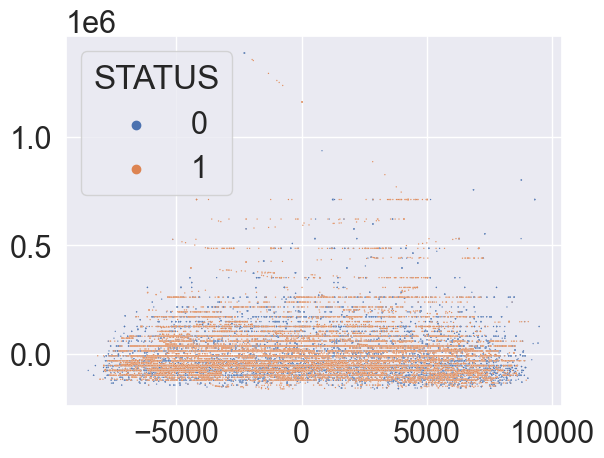

In [97]:
sns.scatterplot(x=X_pca[:,1],y=X_pca[:,0],hue=Y,s=1)

<AxesSubplot:>

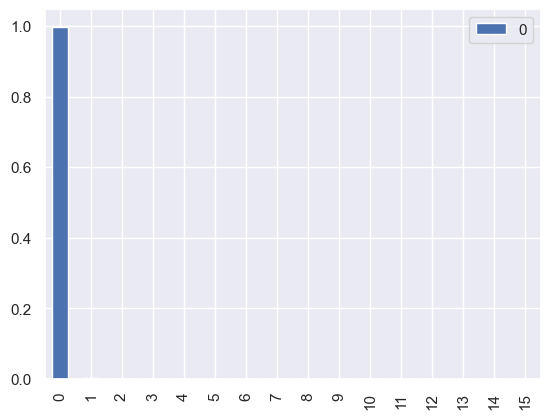

In [98]:
sns.set(font_scale=1)
pca_df=pd.DataFrame(pca.explained_variance_ratio_)
pca_df.plot.bar()

# 8) Train-Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=59562)

# 9) ML Prediction

## 9.1) KNN Classification

In [101]:
from sklearn.neighbors import KNeighborsClassifier

### 9.1.1) Model

In [102]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
knn.score(X_train,Y_train)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9015542957554965

In [104]:
knn.score(X_test,Y_test)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8407279573266395

In [105]:
 knn.score(X_test,Y_test) / knn.score(X_train,Y_train)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

0.932531696964646

In [106]:
Y_pre=knn.predict(X_test)

C:\Users\hp\miniconda3\envs\credit_card\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 9.1.2) Result

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

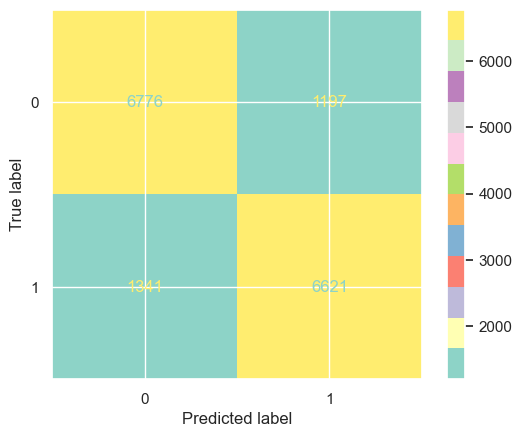

In [108]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pre,cmap='Set3')
plt.savefig('knn_confusion.png',dpi=300, bbox_inches = "tight")

## 9.2) Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

### 9.2.1) Model 

In [110]:
dtc=DecisionTreeClassifier(criterion="gini",max_depth=25)
dtc=dtc.fit(X_train,Y_train)

In [111]:
dtc.score(X_test,Y_test)

0.8842171320991528

In [112]:
dtc.score(X_train,Y_train)

0.9412170784260402

In [113]:
dtc.score(X_test,Y_test) / dtc.score(X_train,Y_train)

0.9394401699316738

In [114]:
Y_pre=dtc.predict(X_test)

### 9.2.2) Result

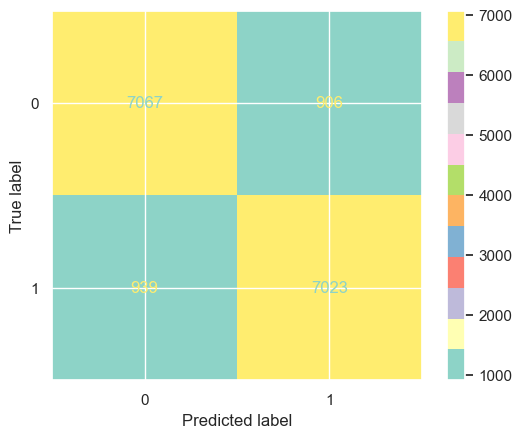

In [115]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pre,cmap='Set3')
plt.savefig('dtc_confusion.png',dpi=300, bbox_inches = "tight")

## 9.3) Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

### 9.3.1) Model

In [117]:
gnb=GaussianNB()
gnb=gnb.fit(X_train,Y_train)

In [118]:
gnb.score(X_test,Y_test)

0.5448384060244744

In [119]:
gnb.score(X_train,Y_train)

0.5496935338786268

In [120]:
gnb.score(X_test,Y_test) /gnb.score(X_train,Y_train)

0.991167573284163

In [121]:
Y_pre=gnb.predict(X_test)

### 9.3.2) Result 

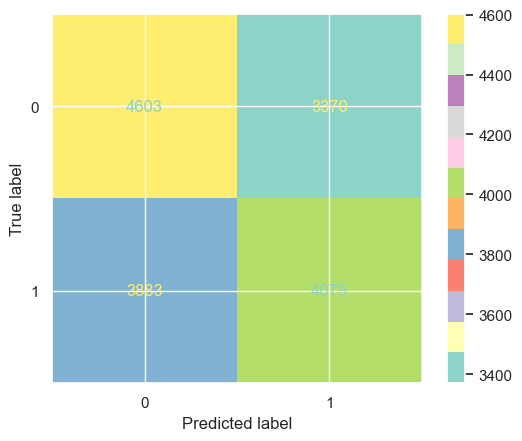

In [122]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pre,cmap='Set3')
plt.savefig('gnb_confusion.png',dpi=300, bbox_inches = "tight")

## 9.4) Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

### 9.4.1) Model

In [124]:
rfc=RandomForestClassifier(n_estimators=250,max_depth=25,min_samples_leaf=7)
# n_estimators=250,max_depth=16,min_samples_leaf=16

In [125]:
rfc=rfc.fit(X_train,Y_train)

In [126]:
rfc.score(X_test,Y_test)

0.8689049262629432

In [127]:
rfc.score(X_train,Y_train)

0.9044829822396084

In [128]:
rfc.score(X_test,Y_test) / rfc.score(X_train,Y_train)

0.9606647591217585

In [129]:
Y_pre=rfc.predict(X_test)

### 9.4.2) Result

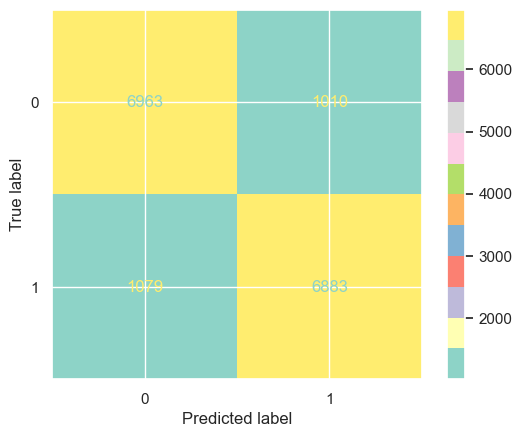

In [130]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pre,cmap='Set3')
plt.savefig('rfc_confusion.png',dpi=300, bbox_inches = "tight")

### 9.4.3) Feature Importance 

In [131]:
rfc.feature_importances_

array([0.0360144 , 0.02638143, 0.02559669, 0.02377108, 0.13898582,
       0.03983563, 0.06593256, 0.06056482, 0.01947838, 0.19147234,
       0.15209283, 0.02765591, 0.03920764, 0.01647563, 0.08697175,
       0.04956311])

In [132]:
record=record.drop(['STATUS','FLAG_MOBIL'],axis=1)

In [133]:
record.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [134]:
feature_imp=pd.DataFrame(rfc.feature_importances_,index=record.columns)
feature_imp.reset_index(inplace=True)
feature_imp.columns=['Feature','Feature Importance']

In [135]:
feature_imp

,Feature,Feature Importance
0,CODE_GENDER,0.036014
1,FLAG_OWN_CAR,0.026381
2,FLAG_OWN_REALTY,0.025597
3,CNT_CHILDREN,0.023771
4,AMT_INCOME_TOTAL,0.138986
5,NAME_INCOME_TYPE,0.039836
6,NAME_EDUCATION_TYPE,0.065933
7,NAME_FAMILY_STATUS,0.060565
8,NAME_HOUSING_TYPE,0.019478
9,DAYS_BIRTH,0.191472


In [136]:
feature_imp.sort_values(by='Feature Importance',inplace=True,ascending=False)
feature_imp['Feature Importance']=feature_imp['Feature Importance']*100

In [137]:
feature_imp

,Feature,Feature Importance
9,DAYS_BIRTH,19.147234
10,DAYS_EMPLOYED,15.209283
4,AMT_INCOME_TOTAL,13.898582
14,OCCUPATION_TYPE,8.697175
6,NAME_EDUCATION_TYPE,6.593256
7,NAME_FAMILY_STATUS,6.056482
15,CNT_FAM_MEMBERS,4.956311
5,NAME_INCOME_TYPE,3.983563
12,FLAG_PHONE,3.920764
0,CODE_GENDER,3.601440


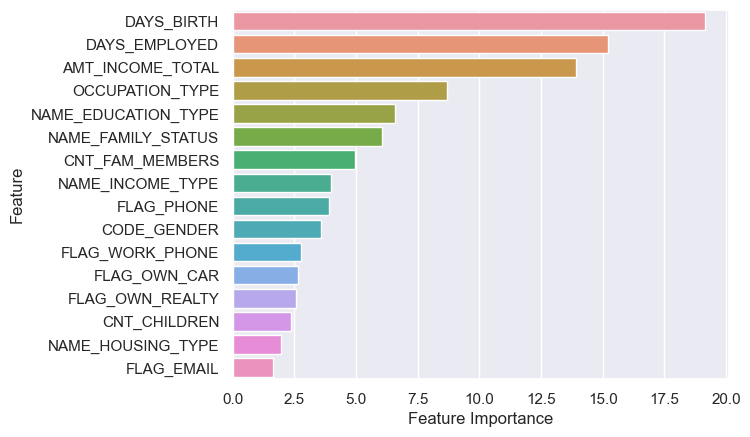

In [146]:
sns.barplot(data=feature_imp,y='Feature',x='Feature Importance')
plt.savefig('feature_importance.png',dpi=300, bbox_inches = "tight")

# 10) Prediction 

In [139]:
from function_file import change_to_bi_check, change_to_bi_check_misc, change_to_num_check

In [140]:
check_data=pd.read_excel('20221102_Random-Person-Profile.xlsx')
check_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,M,Y,Y,0,150000,Working,Academic degree,Single / not married,House / apartment,13232,3790,Y,N,Y,High skill tech staff,2
1,M,N,N,0,20000,Student,Higher education,Single / not married,Rented apartment,8819,800,N,N,Y,IT staff,4
2,M,Y,Y,2,300000,Pensioner,Academic degree,Married,House / apartment,25932,0,N,Y,Y,Core staff,6


In [141]:
check_data=change_to_bi_check(check_gender,'CODE_GENDER',check_data)
check_data=change_to_bi_check(check_car,'FLAG_OWN_CAR',check_data)
check_data=change_to_bi_check(check_reality,'FLAG_OWN_REALTY',check_data)

In [142]:
check_data=change_to_num_check(check_education,'NAME_EDUCATION_TYPE',check_data)
check_data=change_to_num_check(check_income_type,'NAME_INCOME_TYPE',check_data)
check_data=change_to_num_check(check_family,'NAME_FAMILY_STATUS',check_data)
check_data=change_to_num_check(check_house,'NAME_HOUSING_TYPE',check_data)
check_data=change_to_num_check(check_occupation,'OCCUPATION_TYPE',check_data)

In [143]:
check_data=change_to_bi_check_misc(['Y','N'],'FLAG_WORK_PHONE',check_data)
check_data=change_to_bi_check_misc(['Y','N'],'FLAG_PHONE',check_data)
check_data=change_to_bi_check_misc(['Y','N'],'FLAG_EMAIL',check_data)

In [144]:
check_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,0,0,0,150000,0,4,2,1,13232,3790,1,0,1,8,2
1,0,1,1,0,20000,4,3,2,0,8819,800,0,0,1,18,4
2,0,0,0,2,300000,2,4,1,1,25932,0,0,1,1,7,6


In [145]:
dtc.predict(check_data)

array([0, 0, 1], dtype=int64)